## Handle missing values Trial-runs 

In [1]:

import pandas as pd 
import numpy as np
from styles.style1_handle_missing_values import MissingValueHandler, MissingValueHandlingStrategy, DropMissingValuesStrategy, FillMissingValuesStrategy

c:\Users\USER\Desktop\MLDefaults\Rising-Village-Prediction-Model\engineering\styles\__init__.py:5: DtypeWarning: Columns (102,116,128,142,154,180,194,246,343,359,367,380,484,615,725,737,806,827,857,859,999,1076,1191,1234,1263,1538,1541,1592,1593,1632,1679,1681,1723,1735,1770,1785,1804,1855,1857,2182,2230,2252,2368,2577,2580,2631,2632,2671,2742,2758,2784,2805,2858,2885,2927,3364,3372,3510,3540,3543,3557,3571,3628,3741,3788,3835,3863,3882,3920,3930,4006,4044,4053,4100,4157,4383,4402,4430,4506,4553,4929,4943,5005,5009,5013,5017,5077,5166,5174,5177,5222,5491,5504,5537,5736,5745,5845,5849,5855,5866,5878,5879,5901,5923,5931,5945,5967,5995,5996,6011,6017,6018,6075,6115,6118,6430,6440,6451,6475,6483,6525,6532,6703,6763,6808) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [2]:
#loading our dataset after being extracted in the artifacts folder
data_path = (r"C:\Users\USER\Desktop\MLDefaults\Rising-Village-Prediction-Model\artifacts\data_processing\selected_features.csv")
ds = pd.read_csv(data_path)

## Further Analysis of features

In [3]:
data=ds['most_recommend_rtv_program'].unique()
print(data)

[ 1.  3.  4. nan  2.  5. 99.]


[2025-05-29 05:58:56,639: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2025-05-29 05:58:56,674: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


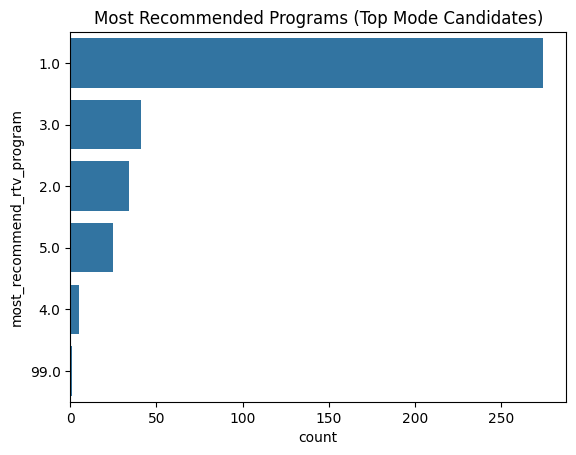

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.countplot(data=ds, y='most_recommend_rtv_program', order=ds['most_recommend_rtv_program'].value_counts().index)
plt.title("Most Recommended Programs (Top Mode Candidates)")
plt.show()

In [5]:
data=ds['least_recommend_rtv_program'].unique()
print(data)

[ 5. 99.  3. nan  4.  2.  1.]


[2025-05-29 05:59:04,617: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2025-05-29 05:59:04,640: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


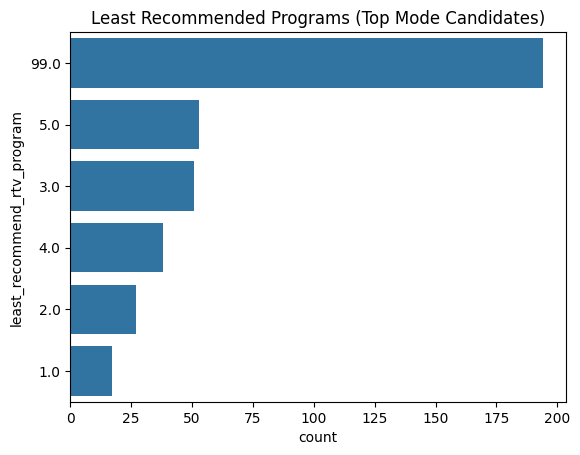

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.countplot(data=ds, y='least_recommend_rtv_program', order=ds['least_recommend_rtv_program'].value_counts().index)
plt.title("Least Recommended Programs (Top Mode Candidates)")
plt.show()

## Missing Value Handling Strategy

In [15]:
# Strategy 1: Mode imputation for recommendation columns only
corrected_columns = ['most_recommend_rtv_program', 'least_recommend_rtv_program', 'least_recommend_rtv_program_reason', 'most_recommend_rtv_program_reason']
strategy1 = FillMissingValuesStrategy(
    method="mode",
    columns=corrected_columns
)
handler = MissingValueHandler(strategy1)
df_imputed = handler.execute_strategy(ds)

print("\nAfter Mode Imputation for Recommendation Columns:")
print(df_imputed)


[2025-05-29 06:22:14,749: INFO: style1_handle_missing_values: Executing Missing Value handling strategy!]
[2025-05-29 06:22:14,749: INFO: style1_handle_missing_values: 
Filling missing values using method=mode]
[2025-05-29 06:22:14,773: INFO: style1_handle_missing_values: Missing Values Filled!]

After Mode Imputation for Recommendation Columns:
     most_recommend_rtv_program  least_recommend_rtv_program  \
0                           1.0                          5.0   
1                           1.0                          5.0   
2                           3.0                         99.0   
3                           4.0                          3.0   
4                           3.0                         99.0   
..                          ...                          ...   
495                         2.0                         99.0   
496                         1.0                         99.0   
497                         3.0                         99.0   
498         